Chapter 03

# 高斯条件概率
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
# initializations
import pandas as pd
import pandas_datareader as web
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yfinance as yf

In [2]:
tickers = ['^GSPC','TSLA','WMT','MCD','USB',
           'YUM','NFLX','JPM','PFE',
           'F','GM','COST','JNJ'];

stock_levels_df = yf.download(tickers, start='2020-07-01', end='2020-12-31')
stock_levels_df.to_csv('stock_levels_df.csv')
stock_levels_df.to_pickle('stock_levels_df.pkl')

[*********************100%%**********************]  13 of 13 completed


In [3]:
y_X_df = stock_levels_df['Adj Close'].pct_change()
y_X_df.dropna(inplace = True)

y_X_df.rename(columns={"^GSPC": "SP500"},inplace = True)
X_df_no_1 = y_X_df[tickers[1:]]
y_df = y_X_df[['SP500']]

In [4]:
labels = ['SP500','TSLA','WMT','MCD','USB',
           'YUM','NFLX','JPM','PFE',
           'F','GM','COST','JNJ'];

In [5]:
#%% Regression

import statsmodels.api as sm

# add a column of ones
X_df = sm.add_constant(X_df_no_1)


model = sm.OLS(y_df, X_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     32.24
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.73e-31
Time:                        19:10:20   Log-Likelihood:                 489.68
No. Observations:                 126   AIC:                            -953.4
Df Residuals:                     113   BIC:                            -916.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -0.974      0.3

In [6]:
X_df

,const,TSLA,WMT,MCD,USB,YUM,NFLX,JPM,PFE,F,GM,COST,JNJ
Date,,,,,,,,,,,,,
2020-07-02,1.0,0.079517,-0.004010,-0.006174,-0.002501,0.001272,-0.018017,0.003248,0.022822,0.011706,0.011218,0.003248,0.004203
2020-07-06,1.0,0.134794,-0.002684,0.027136,0.026191,0.022528,0.035480,0.025253,0.000000,0.023140,0.019414,0.018807,0.014258
2020-07-07,1.0,0.013328,0.067794,-0.014218,-0.033939,-0.018642,-0.001316,-0.028211,-0.013909,-0.011308,-0.023319,0.015217,-0.000909
2020-07-08,1.0,-0.017254,-0.019771,0.000162,-0.001968,-0.003569,0.019507,0.010615,-0.008228,-0.004902,-0.007561,0.000285,0.002940
2020-07-09,1.0,0.020792,0.026599,-0.008179,-0.036328,-0.001964,0.009905,-0.021651,-0.008592,-0.041051,-0.060946,0.029148,-0.005444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.0,0.008808,-0.006796,0.000472,0.025005,-0.005680,-0.024368,0.027945,0.019053,0.022753,0.037897,-0.000387,-0.005107
2020-12-24,1.0,0.024443,0.001955,-0.002972,-0.005136,0.007023,-0.000991,-0.004398,-0.004541,-0.014460,-0.020494,0.007433,0.003488
2020-12-28,1.0,0.002901,0.011986,0.012441,0.003657,0.020830,0.010020,0.006585,-0.012074,0.003386,0.001924,0.017774,0.004722


In [7]:
#%% Regression analysis

y = np.array(y_df.values)

In [8]:
X = X_df.values

In [9]:
X@np.linalg.inv(X.T@X)@X.T

array([[ 0.06616948,  0.01689638,  0.00424831, ..., -0.01416456,
         0.00945222,  0.02562107],
       [ 0.01689638,  0.11266485, -0.07320823, ...,  0.03354242,
         0.0085799 ,  0.02510994],
       [ 0.00424831, -0.07320823,  0.27363154, ..., -0.00122017,
        -0.02100492,  0.01554477],
       ...,
       [-0.01416456,  0.03354242, -0.00122017, ...,  0.0542702 ,
         0.00804621,  0.01110257],
       [ 0.00945222,  0.0085799 , -0.02100492, ...,  0.00804621,
         0.04054005,  0.00786251],
       [ 0.02562107,  0.02510994,  0.01554477, ...,  0.01110257,
         0.00786251,  0.06008219]])

In [10]:
H = X@np.linalg.inv(X.T@X)@X.T

In [11]:
# coefficients
b = np.linalg.inv(X.T@X)@X.T@y

y_hat = H@y
e = y - y_hat

In [12]:
#%% Analysis of Variance

n = y.shape[0]
k = X.shape[1]
D = k - 1

I = np.identity(n)
J = np.ones((n,n))
vec_1 = np.ones_like(y)

y_bar = vec_1.T@y/n

# Sum of Squares for Total, SST
SST = y.T@(I - J/n)@y
MST = SST/(n - 1)
MST = MST[0,0]

In [13]:
#%% Sum of Squares for Error, SSE

SSE = y.T@(I - H)@y

# mean squared error, MSE
MSE = SSE/(n - k)
MSE_ = e.T@e/(n - k)
MSE = MSE[0,0]

In [14]:
#%% Sum of Squares for Regression, SSR

SSR = y.T@(H - J/n)@y
MSR = SSR/D
MSR = MSR[0,0]

In [15]:
#%% Orthogonal relationships

print('SST = ',SST)
print('SSR + SSE = ',SSR + SSE)

print('================')
print('y.T@y = ',y.T@y)
print('y_hat.T@y_hat + e.T@e = ',y_hat.T@y_hat + e.T@e)

print('================')
print('e.T@vec_1 = ', e.T@vec_1)

print('================')
print('e.T@(y_hat - y_bar*vec_1) = ', e.T@(y_hat - y_bar))

print('================')
print('e.T@(y - y_bar*vec_1) = ', e.T@(y - y_bar))

print('================')
print('e.T@X = ', e.T@X)

print('================')
print('e.T@X@b = ', e.T@X@b)

SST =  [[0.01374375]]
SSR + SSE =  [[0.01374375]]
y.T@y =  [[0.01402271]]
y_hat.T@y_hat + e.T@e =  [[0.01402271]]
e.T@vec_1 =  [[-1.10154941e-16]]
e.T@(y_hat - y_bar*vec_1) =  [[6.70003061e-19]]
e.T@(y - y_bar*vec_1) =  [[0.0031065]]
e.T@X =  [[-1.37910516e-16  8.89045781e-18  1.44334414e-18 -2.79859686e-18
   8.37546178e-18 -3.15773883e-18 -3.63207728e-18  8.71935716e-18
   2.48350060e-18 -9.21571847e-19 -8.71596903e-19 -3.88957529e-18
   3.02221356e-18]]
e.T@X@b =  [[5.3139846e-19]]


In [16]:
#%% R squared goodness of fit

R_squared = SSR/SST
R_sqaured_adj = 1 - MSE/MST

In [17]:
#%% F test

F = MSR/MSE

from scipy import stats
p_value_F = 1.0 - stats.f.cdf(F,k - 1,n - k)

In [18]:
#%% Log-likelihood

sigma_MLE = np.sqrt(SSE/n)

ln_L = -n*np.log(sigma_MLE*np.sqrt(2*np.pi)) - SSE/2/sigma_MLE**2

AIC = 2*k - 2*ln_L
BIC = k*np.log(n) - 2*ln_L

In [19]:
#%% t test

C = MSE*np.linalg.inv(X.T@X)

SE_b = np.sqrt(np.diag(C))
SE_b = np.matrix(SE_b).T

T = b/SE_b
p_one_side = 1 - stats.t(n - k).cdf(np.abs(T))
p = p_one_side*2
# P > |t|

In [20]:
#%% confidence interval of coefficients, 95%

alpha = 0.05
t = stats.t(n - k).ppf(1 - alpha/2)
b_lower_CI = b - t*SE_b # 0.025
b_upper_CI = b + t*SE_b # 0.975

In [21]:
#%% multi-collinearity

print('Rank of X')
print(np.linalg.matrix_rank(X))

print('det(X.T@X)')
print(np.linalg.det(X.T@X))

Rank of X
13
det(X.T@X)
1.959168566704102e-17


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

VIF_X_df = pd.Series([VIF(X_df.values, i) 
                      for i in range(X_df.shape[1])], 
                      index=X_df.columns)

print(VIF_X_no_1_df)

const    1.098670
TSLA     1.434394
WMT      1.560756
MCD      1.756690
USB      6.653828
YUM      1.891891
NFLX     1.593447
JPM      6.267205
PFE      1.511675
F        2.935537
GM       2.234937
COST     2.237682
JNJ      1.589850
dtype: float64


In [23]:
VIF_X_no_1_df = pd.Series([VIF(X_df_no_1.values, i) 
               for i in range(X_df_no_1.shape[1])], 
              index=X_df_no_1.columns)

print(VIF_X_df)

TSLA    1.451021
WMT     1.581416
MCD     1.778057
USB     6.713998
YUM     1.933338
NFLX    1.585564
JPM     6.352675
PFE     1.521270
F       3.004005
GM      2.275904
COST    2.275805
JNJ     1.601897
dtype: float64


In [24]:
#%% Conditional probability

# covariance matrix
SIGMA_df = y_X_df.cov()
SIGMA = SIGMA_df.to_numpy()

Text(0.5, 1.0, '$\\Sigma$')

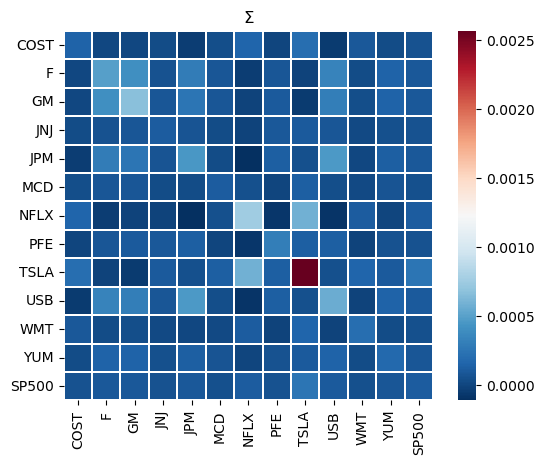

In [25]:
fig, axs = plt.subplots()

h = sns.heatmap(SIGMA_df,cmap='RdBu_r', linewidths=.05)
h.set_aspect("equal")
h.set_title('$\Sigma$')

Text(0.5, 1.0, '$\\Sigma_{XX}^{-1}$')

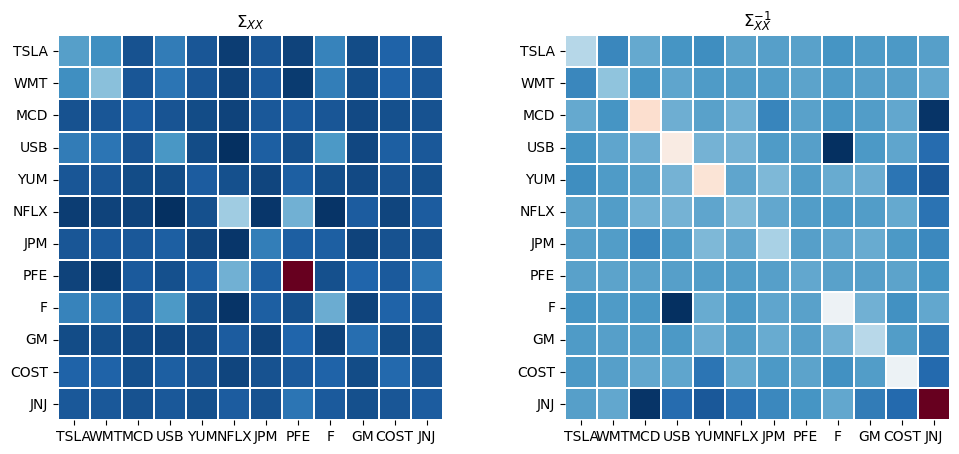

In [26]:
# blocks
SIGMA_Xy = np.matrix(SIGMA[1:,0]).T
SIGMA_XX = np.matrix(SIGMA[1:,1:])

SIGMA_XX_inv = np.linalg.inv(SIGMA_XX)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

plt.sca(axs[0])
ax = sns.heatmap(SIGMA_XX,cmap='RdBu_r', cbar=False, 
                 xticklabels = labels[1:],
                 yticklabels = labels[1:], 
                 linewidths=.05)

ax.set_aspect("equal")
plt.title('$\Sigma_{XX}$')

plt.sca(axs[1])
ax = sns.heatmap(SIGMA_XX_inv,cmap='RdBu_r', cbar=False,
                 xticklabels = labels[1:],
                 yticklabels = labels[1:], 
                 linewidths=.05)

ax.set_aspect("equal")
plt.title('$\Sigma_{XX}^{-1}$')

In [27]:
# calculate coefficient vector, b

b = SIGMA_XX_inv@SIGMA_Xy

Text(0.5, 1.0, '$\\Sigma_{Xy}$')

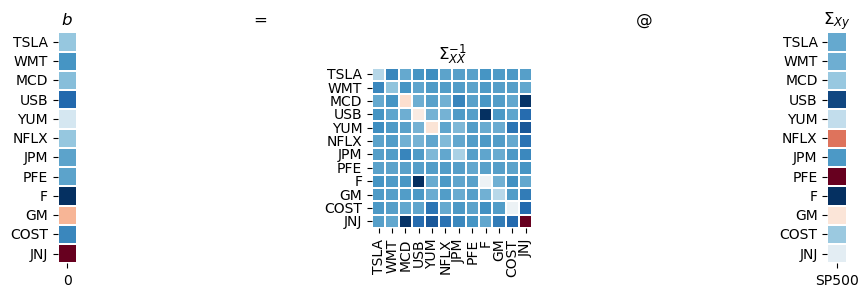

In [28]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(b,cmap='RdBu_r', cbar=False,
                 yticklabels = labels[1:], 
                 linewidths=.05)

ax.set_aspect("equal")
plt.title('$b$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(SIGMA_XX_inv,cmap='RdBu_r', cbar=False,
                 xticklabels = labels[1:],
                 yticklabels = labels[1:], 
                 linewidths=.05)

ax.set_aspect("equal")
plt.title('$\Sigma_{XX}^{-1}$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(SIGMA_Xy,cmap='RdBu_r', cbar=False,
                 xticklabels = [labels[0]],
                 yticklabels = labels[1:], 
                 linewidths=.05)

ax.set_aspect("equal")
plt.title('$\Sigma_{Xy}$')

Text(0.5, 1.0, '$b$')

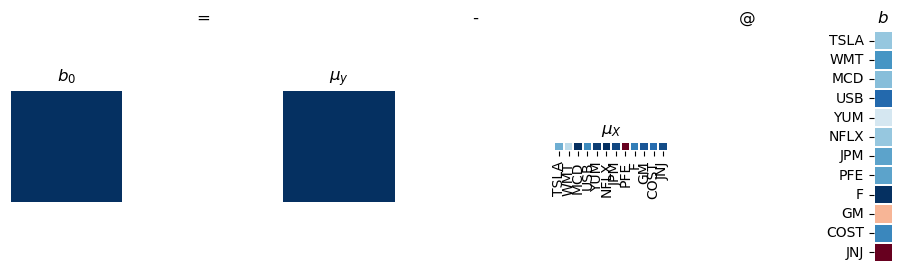

In [29]:
#%% calculate coefficient, b0

MU = y_X_df.mean()
MU = np.matrix(MU.to_numpy())

b0 = MU[0,0] - MU[0,1:]@b

fig, axs = plt.subplots(1, 7, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(b0,cmap='RdBu_r', cbar=False, 
                 linewidths=.05,xticklabels = [],
                 yticklabels = [])

ax.set_aspect("equal")
plt.title('$b_0$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(np.matrix(MU[0,0]),cmap='RdBu_r', cbar=False,
                 linewidths=.05, xticklabels = [],
                 yticklabels = [])

ax.set_aspect("equal")
plt.title('$\mu_{y}$')

plt.sca(axs[3])
plt.title('-')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(MU[0,1:],cmap='RdBu_r', cbar=False,
                 xticklabels = labels[1:], yticklabels = [],
                 linewidths=.05)
ax.set_aspect("equal")
plt.title('$\mu_{X}$')


plt.sca(axs[5])
plt.title('@')
plt.axis('off')

plt.sca(axs[6])
ax = sns.heatmap(b,cmap='RdBu_r', cbar=False,
                 yticklabels = labels[1:], xticklabels = [],
                 linewidths=.05)

ax.set_aspect("equal")
plt.title('$b$')